<img src='https://www.vectorlogo.zone/logos/strava/strava-icon.svg' border='0' alt='Strava-1'/>

Analisi dati Strava

Per chi non conoscesse Strava, in super sintesi è il social network dove si possono registrare tutte le attività sportive da parte degli utenti.

Come Facebook/Twitter/Instagram si possono seguire diversi profili e si può allo stesso tempo essere seguiti da altre persone.

Nella "home" pubblica vengono riportate tutte le attività effettuate dagli utenti che si seguono, si possono assegnare kudos (l'equivalente del like) e lasciare commenti.
Nella dashboard privata si possono visualizzare tutte le proprie attività, statistiche i personal best e molte altre funzioni che non starò qui ad approfondire.
Le attività possono essere caricate manualmente oppure può essere collegato automaticamente agli Smartwatch come Garmin, Coros (tra i più comuni).

<img src='https://blog.strava.com/wp-content/uploads/2020/03/03-Save-Sync-Share.png' border='0' alt='Strava-1'/>

Il mio profilo Strava è pubblico e si trova al seguente link:
https://www.strava.com/athletes/49726793

<img src='https://i.postimg.cc/ydxR8Ng8/Strava-1.png' border='0' alt='Strava-1'/>


I dati di tutte le attività sono stati ricavati attraverso le API che Strava mette a disposizione.
Per utilizzarle, è necessario configurare un APP al seguente indirizzo:
https://www.strava.com/settings/api  

La documentazione è presente al seguente link
https://developers.strava.com/docs/reference/
<img src='https://i.postimg.cc/nzgcv42N/Strava2.png' border='0' alt='Strava-1'/>

Il servizio usato è il seguente:
"List Athlete Activities (getLoggedInAthleteActivities)
Returns the activities of an athlete for a specific identifier. Requires activity:read. Only Me activities will be filtered out unless requested by a token with activity:read_all."

Le spiegazioni di come usare i link e i token di sessione al seguente video:
https://www.youtube.com/embed/sgscChKfGyg


L'esercizio è quello di:

1 - Data Analisys sui dati provenienti dal servizio Strava (getLoggedInAthleteActivities):
    Valutazione della tipologia dei dati, visualizzazione valori unici e valori nulli.
    
2 - Data Cleaning e rimozioni dati:
    Comprensione delle colonne e valutazione del perchè effettuare la rimozione dei valori
    
3 - Data Visualization:
    Grafici relativi alle attività effettuate

I primi due passaggi sono abbastanza tecnici.
Sono stati ricavati degli ulteriori dataset per capire i valori base, la tipologia delle variabili.


Consiglio di andare direttamente alla parte di Data Visualization in cui vengono mostrate le statistiche prima relative al 2022 e poi in comparazione con i dati del 2021.


Potete trovare il repository git al mio profilo:
https://github.com/scionuait/StravaDataImport

Potete scrivermi a:
gianlucachimentin@gmail.com


In [1]:
#import data analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import custom function to explore dataset value
from src.explore_functions import df_value_stat

#set display option value
pd.set_option('display.max_columns', None)
sns.set()
#define constant value
RANDOM_STATE = 42
TRAIL_RUNNING_ELEV = 350

In [2]:
#imposta i parametri di stile per la visualizzazione dei grafici
sns.set(font_scale=0.7)
sns.set_style("darkgrid")
sns.set_palette("Paired")

In [3]:
#import dataset of strava activities using Strava API, form more 
df = pd.read_json("data/dataset_strava_gianluca.json")

In [4]:
#display random position of dataset
df.sample(2, random_state=RANDOM_STATE)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,average_watts,kilojoules,device_watts
419,2,"{'id': 49726793, 'resource_state': 1}",Morning Run,7047.4,2166,2216,6.0,Run,Run,NaN,4354122747,2020-11-18T06:33:06Z,2020-11-18T07:33:06Z,(GMT+01:00) Europe/Rome,3600,NaN,NaN,NaN,17,0,0,1,0,"{'id': 'a4354122747', 'summary_polyline': 'wyk...",False,False,False,False,everyone,False,None,"[45.4494, 9.163984]","[45.449853, 9.165346]",3.254,4.800,82.4,18.0,True,149.7,171.0,False,True,135.6,128.6,4.654050e+09,4.654050e+09,garmin_push_5837884969,False,6,0,False,44.0,NaN,NaN,NaN
75,2,"{'id': 49726793, 'resource_state': 1}",Recovery run,7247.5,2421,2795,53.0,Run,Run,0.0,7322189996,2022-06-17T05:17:24Z,2022-06-17T07:17:24Z,(GMT+01:00) Europe/Rome,7200,NaN,NaN,NaN,0,1,0,1,0,"{'id': 'a7322189996', 'summary_polyline': '{yk...",False,False,False,False,everyone,False,g9651183,"[45.44942306354642, 9.162770407274365]","[45.44965767301619, 9.163868017494678]",2.994,3.944,80.1,30.0,True,144.2,163.0,False,True,157.2,127.0,7.800677e+09,7.800677e+09,garmin_push_9032131112,False,0,0,False,37.0,NaN,NaN,NaN


In [105]:
#return dataset statistic value based on dataset value
#function available here: from src.explore_functions import df_value_stat
df_value = df_value_stat(df)

In [44]:
df_value

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,resource_state,"2 427 Name: resource_state, dtype: int64",1,int64,0,0.00
1,athlete,"{'id': 49726793, 'resource_state': 1} 427 N...",1,object,0,0.00
2,name,Morning Run 194 Evening R...,125,object,0,0.00
3,distance,0.0 13 7820.5 1 11615.1 1 2782...,415,float64,0,0.00
4,moving_time,1800 12 3605 5 2228 2 2095 2 33...,384,int64,0,0.00
5,elapsed_time,1800 11 3605 4 3602 3 3607 3 36...,382,int64,0,0.00
6,total_elevation_gain,0.0 58 4.0 26 1.0 25 3.0 ...,160,float64,0,0.00
7,type,Run 394 Workout 13 Ride ...,7,object,0,0.00
8,sport_type,Run 380 TrailRun 14 Workout ...,8,object,0,0.00
9,workout_type,0.0 122 1.0 5 3.0 3 10.0 ...,4,float64,296,69.32


Iniziamo la semplificazione del dataset iniziale di 54 righe eliminando le colonne che hanno oltre il 60% dei valori nulli che non reputo importanti per l'analisi

In [7]:
df_value[df_value["null_value_%"]>60.0]

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
9,workout_type,0.0 122 1.0 5 3.0 3 10.0 ...,4,float64,296,69.32
15,location_city,"Series([], Name: location_city, dtype: int64)",0,float64,427,100.00
16,location_state,"Series([], Name: location_state, dtype: int64)",0,float64,427,100.00
17,location_country,"Series([], Name: location_country, dtype: int64)",0,float64,427,100.00
30,gear_id,g9651183 96 g11123897 49 g9651184 1...,3,object,265,62.06
52,average_watts,59.5 1 44.7 1 76.2 1 61.0 1 21.3 ...,10,float64,417,97.66
53,kilojoules,81.3 2 381.3 1 190.9 1 264.6 1 10...,9,float64,417,97.66
54,device_watts,"0.0 10 Name: device_watts, dtype: int64",1,float64,417,97.66


In [8]:
df = df.drop(columns=df_value[df_value["null_value_%"]>60.0]["columns_name"])

In [9]:
df.head(2)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,start_date_local,timezone,utc_offset,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score
0,2,"{'id': 49726793, 'resource_state': 1}",40 ' L,7820.5,2412,2412,7.0,Run,Run,8213319572,2022-12-06T06:21:50Z,2022-12-06T07:21:50Z,(GMT+01:00) Europe/Rome,3600,1,2,0,1,0,"{'id': 'a8213319572', 'summary_polyline': 'qyk...",False,False,False,False,everyone,False,"[45.449374951422215, 9.163089925423265]","[45.4495622869581, 9.163387566804886]",3.242,4.107,82.4,15.0,True,161.8,179.0,False,True,188.6,127.6,8.799832e+09,8.799832e+09,garmin_ping_249922102342,False,0,0,False,80.0
1,2,"{'id': 49726793, 'resource_state': 1}",Morning Run,7829.8,2406,2406,0.0,Run,Run,8200380590,2022-12-03T07:58:27Z,2022-12-03T08:58:27Z,(GMT+01:00) Europe/Rome,3600,0,2,0,1,0,"{'id': 'a8200380590', 'summary_polyline': '{zk...",False,False,False,False,everyone,False,"[45.449586594477296, 9.164031464606524]","[45.44984970241785, 9.164545275270939]",3.254,4.346,82.4,17.0,True,162.4,185.0,False,True,177.8,117.6,8.785157e+09,8.785157e+09,garmin_ping_249528929321,False,0,0,False,84.0


Eliminando le colonne con oltre il 60% delle colonne nulle otteniamo 47 colonne

In [10]:
df.shape

(427, 47)

Analisi dei dati e rimozione delle colonne

In base alla tipologia di dati visualizzati sopra ho deciso di semplificare il dataset eliminando le colonne che non reputo "interessanti" al fine dell'analisi statistica annuale:

- resource_state: vale 2 in tutto il dataset, non necessario al fine di analisi sul dataset;
- athlete: nel dataset è presente un solo atleta (io) quindi non è necessario;
- id: si tratta di un valore chiave dell'attività, lo rimuovo in quanto non lo utilizzo per fare le chiamate;
- start_date_local: analogo al valore start_date ma con timezone locale;
- timezone: indica la timezone dell'attività;
- utc_offset: si tratta di 6 valori di tipo numerico nel dataset;
- photo_count: è valorizzato a 0 per tutto il dataset quindi lo tolgo;
- map: si tratta di un oggetto di tipo polilinea che indica la mappa, non è rilevante per le statistiche;
- commute: un solo valore nel dataset è uguale a True, lo rimuovo perchè non riesco a trovare una valore aggiunto;
- private: sono le attività contrassegnate come private (non sono presenti nel mio dataset) quindi le rimuovo;
- visibility: tutte le attività sono visibili quindi non mi serve quindi lo rimuovo;
- flagged: sempre valorizzato a false quindi rimuovo;
- gear_id: nel dataset sono presenti 3 valori differenti, oltre il 60% dei valori è nullo;
- start_latlng: oggetto che indica la latitudine e longitudine di partenza (non analizzato nel dataset);
- end_latlng: oggetto che indica la latitudine e longitudine di arrivo (non analizzato nel dataset);
- heartrate_opt_out: dati di battito cardiaco;
- display_hide_heartrate_option: valore che indica l'opzione di visualizzazione dei dati cardiaci;
- upload_id: valori chiave da utilizzare con altri servizi;
- upload_id_str: valori chiave da utilizzare con altri servizi;
- external_id: valori chiave da utilizzare con altri servizi;
- from_accepted_tag: sempre false tranne in un attività del 2021 quindi lo rimuovo;
- average_watts: numero che indica la potenza durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- kilojoules: numero che indica i kilojoules durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- device_watts: il numero di watts indicati dall'attività. Il numero di valori nulli è 417 quindi è già stato rimosso;


Rimuoviamo dunque le seguenti colonne dal Dataset

In [11]:
["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"]

['resource_state',
 'athlete',
 'id',
 'start_date_local',
 'timezone',
 'utc_offset',
 'photo_count',
 'map',
 'commute',
 'private',
 'visibility',
 'flagged',
 'start_latlng',
 'end_latlng',
 'heartrate_opt_out',
 'display_hide_heartrate_option',
 'upload_id',
 'upload_id_str',
 'external_id',
 'from_accepted_tag']

In [12]:
df = df.drop(columns=["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"])

In [13]:
df.shape

(427, 27)

Il numero di colonne passa dunque da 54 iniziali a 27

In [14]:
df.sample(5, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
419,Morning Run,7047.4,2166,2216,6.0,Run,Run,2020-11-18T06:33:06Z,17,0,0,1,False,False,3.254,4.800,82.4,18.0,True,149.7,171.0,135.6,128.6,6,0,False,44.0
75,Recovery run,7247.5,2421,2795,53.0,Run,Run,2022-06-17T05:17:24Z,0,1,0,1,False,False,2.994,3.944,80.1,30.0,True,144.2,163.0,157.2,127.0,0,0,False,37.0
177,50' L 5x10'' sprint salita,10489.5,3410,3548,14.0,Run,Run,2021-12-14T06:11:38Z,0,0,0,1,False,False,3.076,6.260,80.7,10.0,True,157.2,180.0,-75.8,-84.0,0,0,False,97.0
30,40 minuti corsa tranquilla,7371.8,2236,2410,41.0,Run,Run,2022-09-04T06:27:51Z,1,3,0,1,False,False,3.297,3.962,82.7,30.0,True,149.4,161.0,208.8,161.6,0,1,False,46.0
358,Evening Run,5770.5,1759,1759,4.0,Run,Run,2021-02-25T18:11:24Z,5,1,0,1,False,False,3.281,4.700,83.0,22.0,True,149.3,169.0,87.6,81.4,3,0,False,36.0


Dei valori presenti nel dataset cercho di chiarire la differenza tra moving time e elapsed time visualizzando le statistiche di base (minino, massimo, media e deviazione standard)

In [15]:
df[["moving_time","elapsed_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
moving_time,427.0,4458.875878,5425.868466,712.0,2411.5,3314.0,4254.0,82800.0
elapsed_time,427.0,4754.044496,5817.174149,737.0,2518.0,3395.0,4336.0,82800.0


<AxesSubplot:>

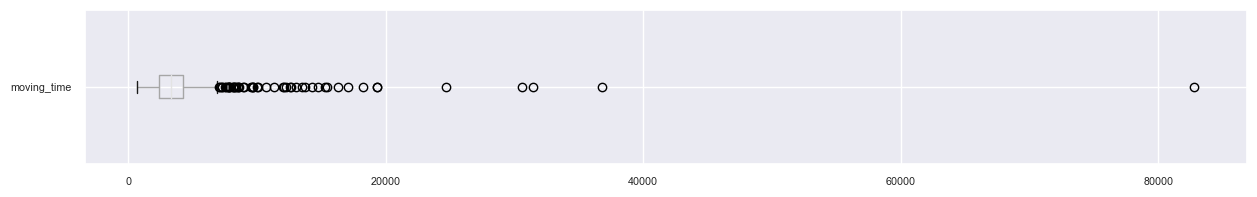

In [16]:
plt.figure(figsize=(15,2))
df[["moving_time"]].boxplot(vert=False)

In [17]:
df[df["moving_time"]==df["moving_time"].max()]

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
28,"Tot dret 130 12000 D+, 39 ore",135000.0,82800,82800,0.0,Run,TrailRun,2022-09-13T19:00:15Z,0,14,4,1,False,True,1.63,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,0,6,False,NaN


Per chiarire la differenza tra i valori cerco una gara che ho fatto quest'anno di cui ricordo il tempo

In [18]:
df[(df["moving_time"]!=df["elapsed_time"]) & (df["name"].str.contains("Ferriere"))].head(5)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
97,Ferriere Trail Giro di Sardegna 😂 31 km 1600+,29367.4,14732,15278,1542.3,Run,Run,2022-04-30T07:59:08Z,0,10,2,1,False,False,1.922,5.444,70.6,25.0,True,136.5,170.0,1524.5,623.2,0,2,False,164.0


- Moving time: fa riferimento al tempo in movimento durante la gara (il garmin per esempio anche senza essere stoppato tende ad escludere il tempo in cui una persona è ferma);
- Elapsed time: fa riferimento al tempo di durata di tutta l'attività;

Esempio nella gara sopra selezionata il Ferriere Trail il tempo segnato alla fine dal Garmin era più basso del tempo registrato nel cronometro durante la gara.




Questo perchè durante i ristori il garmin ha smesso di registrare il tempo in movimento.
Se alla fine dell'attività contrassegnamo l'attività come gara il tempo visualizzato è diverso (quindi viene considerato l'elapsed time e non il moving time).

Nel dataset può essere utile analizzare entrambi i valori (per esempio per vedere quanto in gare lunghe mi fermo ai ristori).


Verifichiamo nuovamente le statistiche a valle della pulizia delle colonne:

In [19]:
df_value_clean = df_value_stat(df)

In [20]:
df_value_clean

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,name,Morning Run 194 Evening R...,125,object,0,0.00
1,distance,0.0 13 7820.5 1 11615.1 1 2782...,415,float64,0,0.00
2,moving_time,1800 12 3605 5 2228 2 2095 2 33...,384,int64,0,0.00
3,elapsed_time,1800 11 3605 4 3602 3 3607 3 36...,382,int64,0,0.00
4,total_elevation_gain,0.0 58 4.0 26 1.0 25 3.0 ...,160,float64,0,0.00
5,type,Run 394 Workout 13 Ride ...,7,object,0,0.00
6,sport_type,Run 380 TrailRun 14 Workout ...,8,object,0,0.00
7,start_date,2022-12-06T06:21:50Z 1 2021-06-03T05:35:57Z...,427,object,0,0.00
8,achievement_count,0 231 1 67 2 27 3 20 5 ...,23,int64,0,0.00
9,kudos_count,1 121 2 101 3 83 0 53 4 ...,15,int64,0,0.00


Cerchiamo di chiarire la differenza tra il parametro di type e Sport Type andando ad estrarre due attività in cui il valore di Type e Sport Type è differente.

In [108]:
df[df["type"]!= df["sport_type"]].tail(2)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 08:54:43+00:00,Morning Run,18633.2,9547,11275,1023.0,Run,TrailRun,2021-02-27 08:54:43+00:00,2,3,0,1,False,False,1.952,5.3,69.5,24.0,True,153.6,170.0,1280.6,400.0,1,0,False,226.0,2021,2,Saturday
2021-02-13 08:51:34+00:00,Morning Run,4969.0,3237,3395,438.0,Run,TrailRun,2021-02-13 08:51:34+00:00,0,2,0,1,False,False,1.535,4.3,63.7,12.0,True,138.0,157.0,1223.6,780.0,0,0,False,40.0,2021,2,Saturday


Visualizziamo le attività reggruppando per Type e Sport Type.

In [22]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           380
           TrailRun       14
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            3
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Le uniche differenze sono tra Run e Trail Run.
Ricordo che l'attività di Trail Running è stata introdotta su Strava di recente, probabilmente hanno deciso di introdurre una nuova colonna (sport type) per riuscire a discriminare tra Running e Trail Running senza andare a cancellare lo storico e trattando il Trail come un sottoinsieme delle attività di Running ma allo stesso tempo dando possibilità agli utenti di discriminare tra Run e Trail Run (ma questo è solamente un mio pensiero)

Il numero di attività relative al Trail running sono molto basse rispetto al numero di attività che ho effettivamente fatto, non mi torna. Dato che quando faccio delle sessioni di trail faccio solitamente almeno più di 300/400 metri di dislivello faccio una verifica sulle attività che superano questa soglia di dislivello e vado a reimpostare i valori in Trail Run.



In [112]:
df.loc[(df["total_elevation_gain"]>TRAIL_RUNNING_ELEV) & (df["type"]=="Run"),"sport_type"]="TrailRun"

In [113]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           353
           TrailRun       41
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            3
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Per facilitare la visualizzazione dei dati e trattarli come serie, effettuo prima una conversione del parametro Start_Date (importato come object) e lo utilizzo come indice del dataset.

In [25]:
#convert start date type
df['start_date'] = pd.to_datetime(df['start_date'])

In [114]:
#set index data
df = df.set_index(df.start_date)
df.sample(2, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-18 06:33:06+00:00,Morning Run,7047.4,2166,2216,6.0,Run,Run,2020-11-18 06:33:06+00:00,17,0,0,1,False,False,3.254,4.800,82.4,18.0,True,149.7,171.0,135.6,128.6,6,0,False,44.0,2020,11,Wednesday
2022-06-17 05:17:24+00:00,Recovery run,7247.5,2421,2795,53.0,Run,Run,2022-06-17 05:17:24+00:00,0,1,0,1,False,False,2.994,3.944,80.1,30.0,True,144.2,163.0,157.2,127.0,0,0,False,37.0,2022,6,Friday


Per facilitare i raggruppamenti, in considerazione degli anni successivi aggiungo anche le colonne relative all'anno, mese e giorno della settimana

In [115]:
df["years"] = df.index.year
df["month"] = df.index.month
df["day_of_week"] = df.index.day_name()

In [116]:
df.sample(2, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-18 06:33:06+00:00,Morning Run,7047.4,2166,2216,6.0,Run,Run,2020-11-18 06:33:06+00:00,17,0,0,1,False,False,3.254,4.800,82.4,18.0,True,149.7,171.0,135.6,128.6,6,0,False,44.0,2020,11,Wednesday
2022-06-17 05:17:24+00:00,Recovery run,7247.5,2421,2795,53.0,Run,Run,2022-06-17 05:17:24+00:00,0,1,0,1,False,False,2.994,3.944,80.1,30.0,True,144.2,163.0,157.2,127.0,0,0,False,37.0,2022,6,Friday


Al termine della prima parte di modifica del dataset visualizzo una panoramica delle attività negli anni per capire come concentrare l'analisi e valutare quali righe andare a rimuovere.

In [117]:
pd.DataFrame(df.groupby(["sport_type","years"]).count()["name"])

name
sport_type years      
Hike       2020      1
           2021      2
           2022      1
Ride       2021      5
           2022      5
Run        2020     34
           2021    199
           2022    120
Snowboard  2022      1
Swim       2022      2
TrailRun   2021     14
           2022     27
Walk       2021      3
Workout    2021      1
           2022     12

Dalla tabella relativa alle attività, posso dedurre come effettivamente le uniche attività che vale la pena analizzare sono Run e Trail Run. Inoltre le attività prima del 2020 posso rimuoverle in quanto sono solamente dati parziali, in precedenza utilizzavo Runtastic per effettuare le attività.
Come ultima fase di pulizia del dataset:
- rimuovo i valori del 2020
- considero solamente le attività di Run e Trail Run


In [89]:
df_final = df[((df["sport_type"]=="Run") | (df["sport_type"]=="TrailRun"))&(df["years"]!=2020)]

Data Visualization

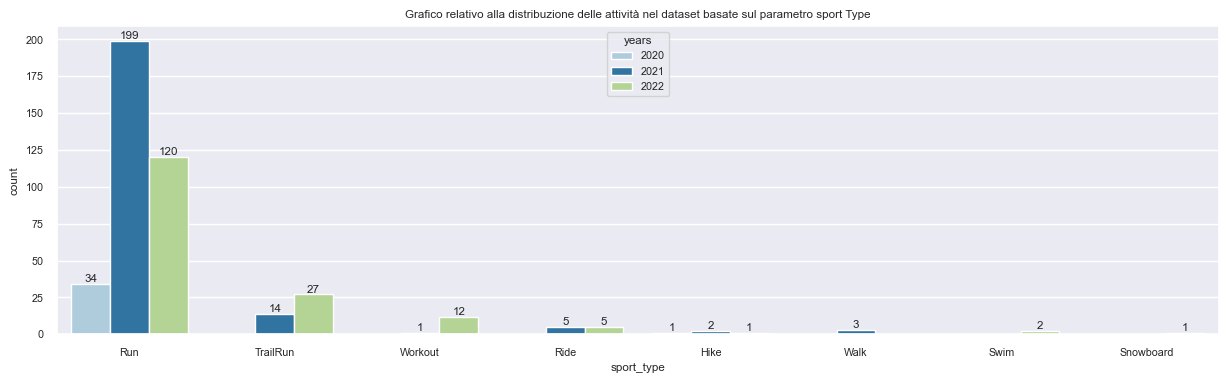

In [118]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x="sport_type", order=df['sport_type'].value_counts().index, hue="years")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Grafico relativo alla distribuzione delle attività nel dataset basate sul parametro sport Type")
plt.show()

Visualizzazione attività 2022

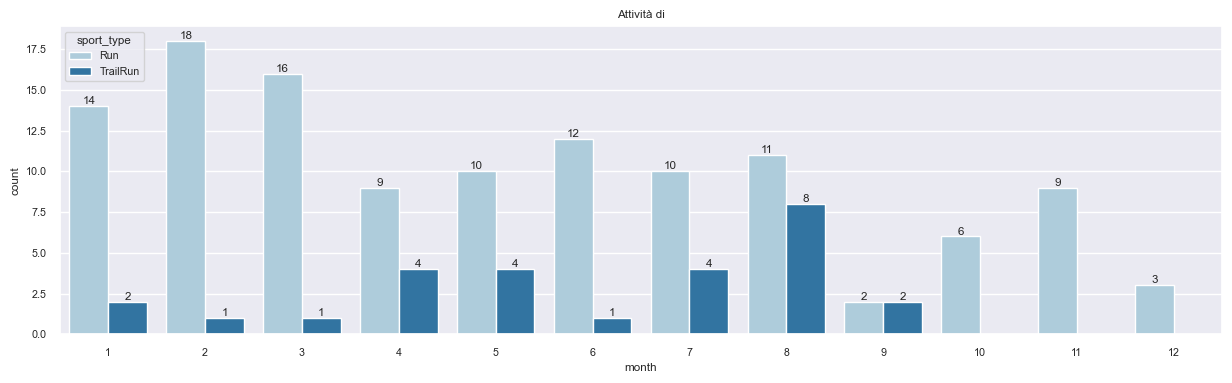

In [125]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df_final[df_final["years"]==2022], x="month", hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di attività distribuite nei mesi dell'anno divise tra trail run e run")
plt.show()

In [166]:
#df_group_by_monts = df_final[df_final["years"]==2022].groupby(["month","sport_type"]).sum()

In [176]:
#df_group_by_monts

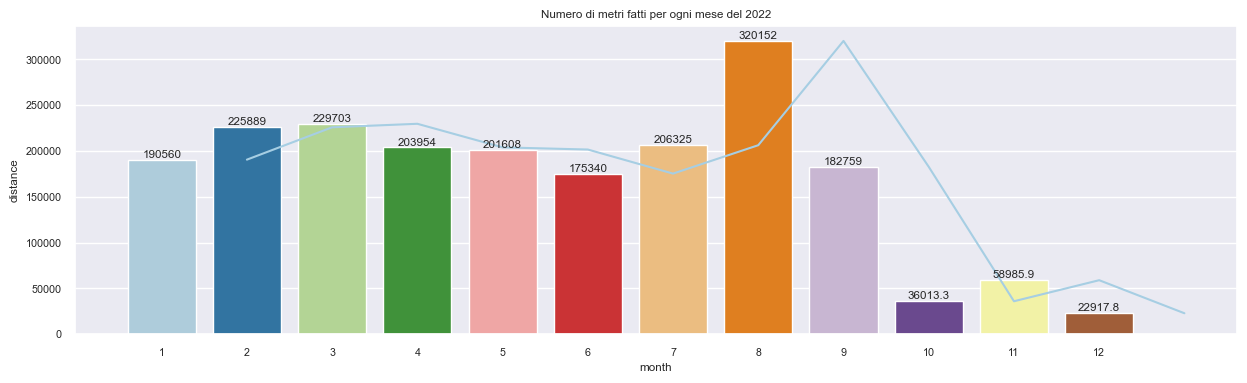

In [188]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="distance", estimator=sum, ci=None)
sns.lineplot(data=df_final[df_final["years"]==2022], x="month", y="distance", estimator=sum, ci=None)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di metri fatti per ogni mese del 2022")
plt.show()

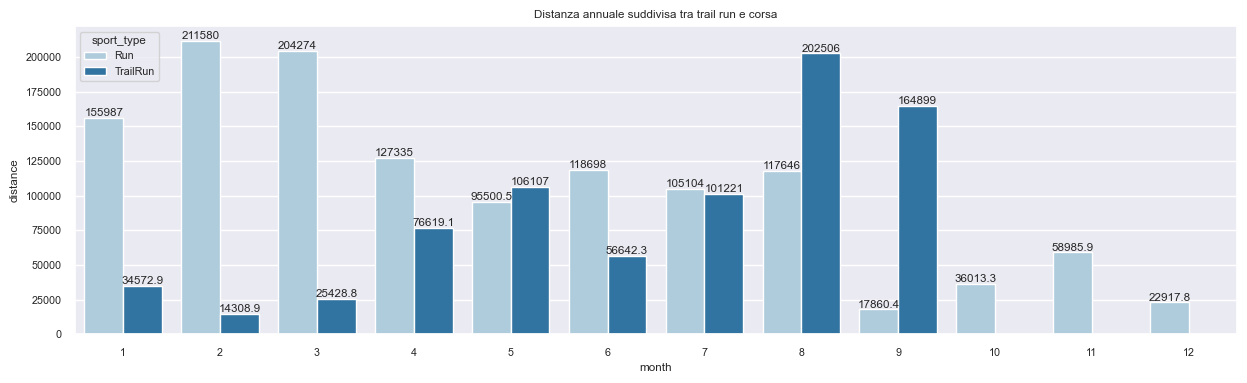

In [181]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="distance", estimator=sum, ci=None,hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Distanza annuale suddivisa tra trail run e corsa")
plt.show()

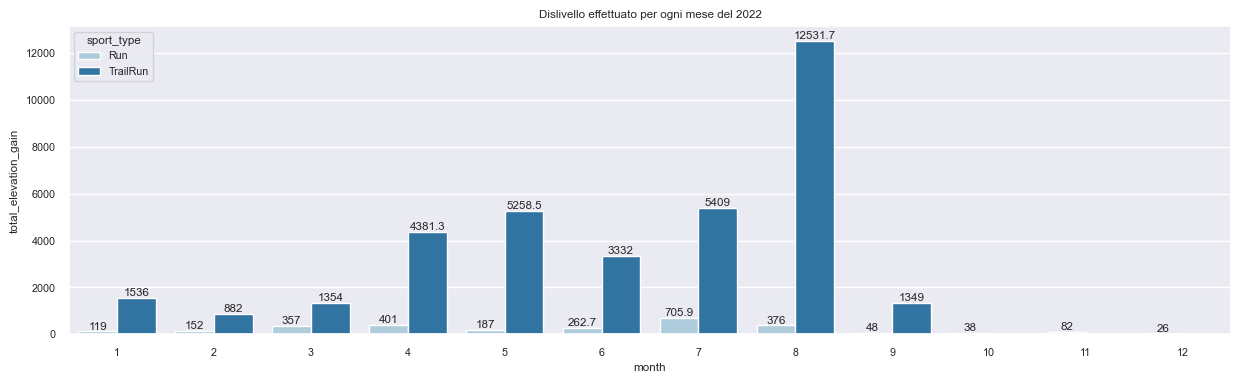

In [186]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="total_elevation_gain", estimator=sum, ci=None,hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Dislivello effettuato per ogni mese del 2022")
plt.show()

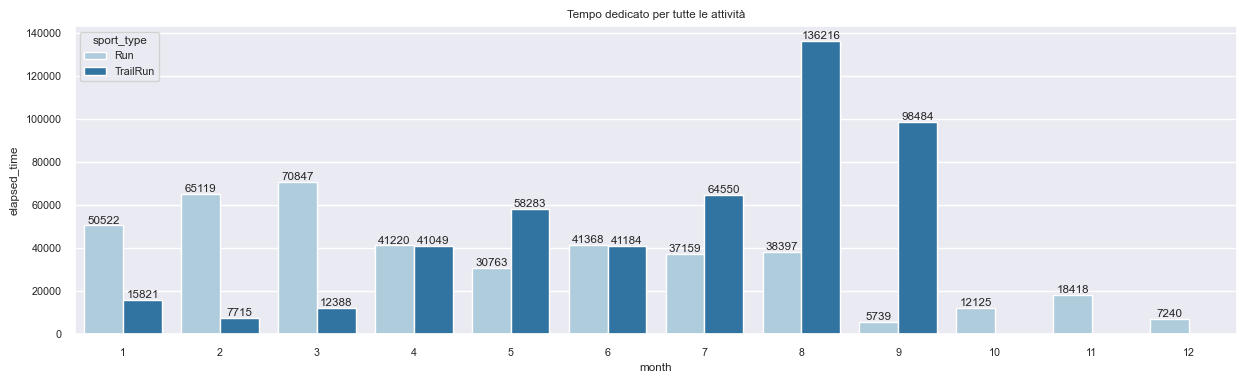

In [187]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="elapsed_time", estimator=sum, ci=None,hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Tempo dedicato per tutte le attività")
plt.show()